# Visualizing Hallucination Results from (MCQA)
In this notebook we visualize the results from the MCQA hallucination test (defined in hallucination_eval.py). The test were run in hallucination_eval.ipynb on summaries from 5 countries , 5 event types, from Jan 20205 to June 2025

In [21]:
import pandas as pd
df_hal_nocontext = pd.read_csv("hallucination_nocontext2.csv")
df_hal_context = pd.read_csv("hallucination_with_context.csv")

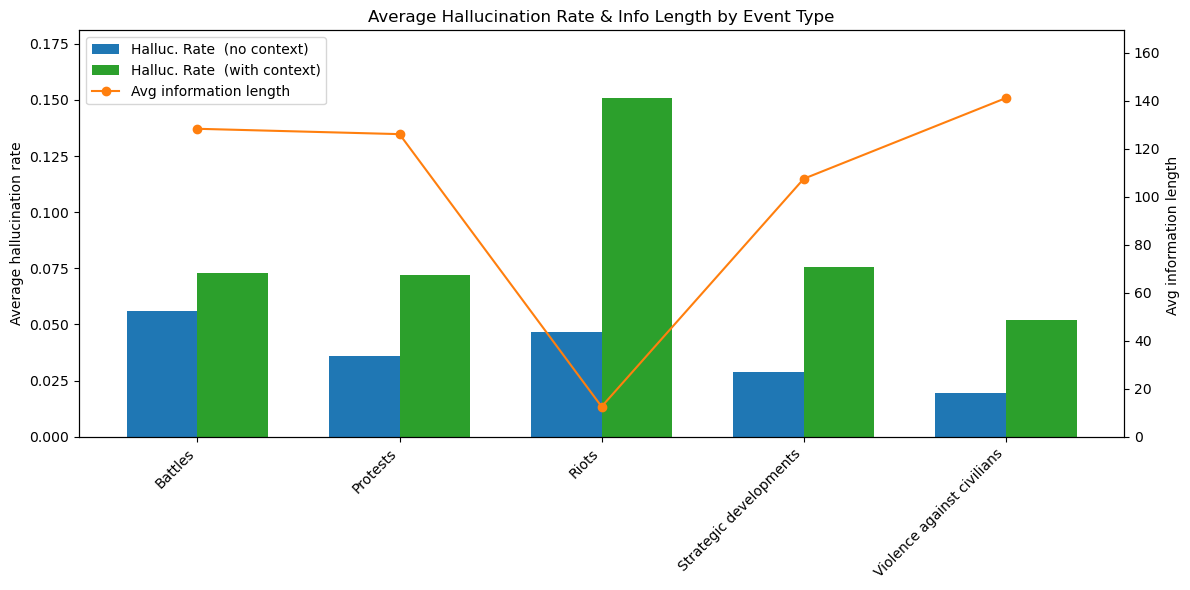

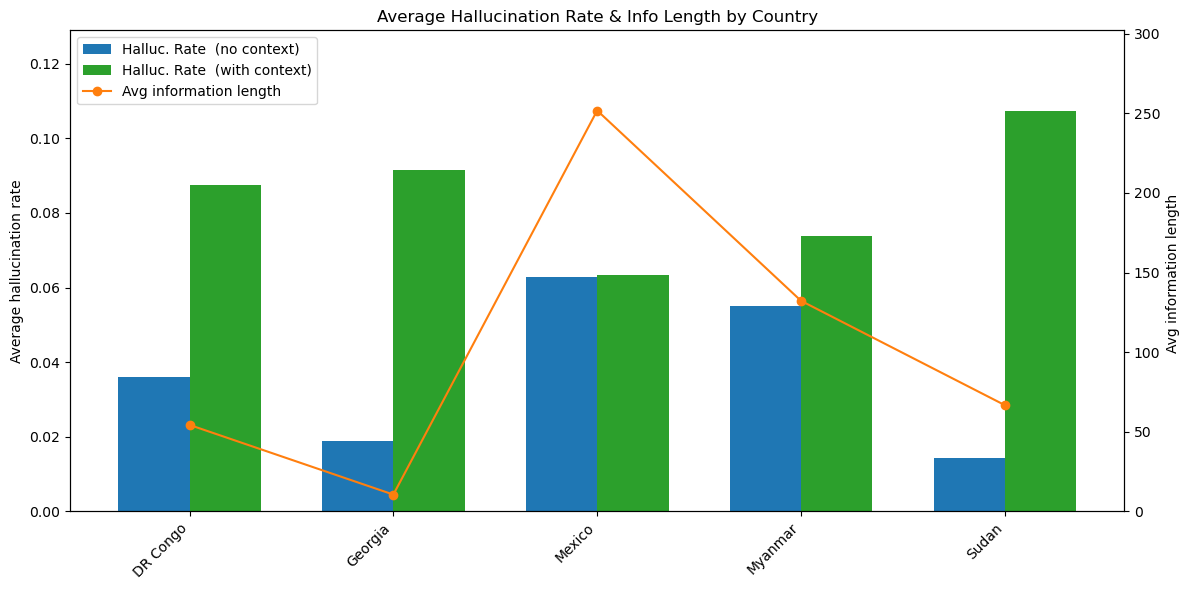

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------------------
# 1)  PREP – merge “with” and “no-context” results side-by-side
# -------------------------------------------------------------
def prep(df_ctx: pd.DataFrame, df_nctx: pd.DataFrame, group_cols):
    """Return a tidy DataFrame with ctx / nctx halluc-rates + info length."""
    ctx  = (df_ctx .groupby(group_cols, as_index=False)
                    .agg(ctx_rate  = ("hallucination_rate", "mean"),
                         info_len  = ("info_length",        "mean")))
    nctx = (df_nctx.groupby(group_cols, as_index=False)
                    .agg(nctx_rate = ("hallucination_rate", "mean")))
    return ctx.merge(nctx, on=group_cols)

# ---------- a. aggregate by EVENT TYPE ----------
df_event = prep(df_hal_context, df_hal_nocontext, ["event_type"])
x_lbls   = df_event["event_type"]

# ---------- b. aggregate by COUNTRY  ------------
df_country           = prep(df_hal_context, df_hal_nocontext, ["country"])
df_country["country"] = df_country["country"].replace(
    {"Democratic Republic of Congo": "DR Congo"})  # nicer label
y_lbls = df_country["country"]

# -------------------------------------------------------------
# 2)  UNIVERSAL PLOTTING HELPER
# -------------------------------------------------------------
def plot_combo(df, labels, title, fname):
    x      = np.arange(len(df))
    width  = 0.35

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bars: hallucination rate
    b1 = ax1.bar(x - width/2, df["nctx_rate"], width,
                 label="Halluc. Rate  (no context)", color="tab:blue")
    b2 = ax1.bar(x + width/2, df["ctx_rate"], width,
                 label="Halluc. Rate  (with context)", color="tab:green")
    ax1.set_ylabel("Average hallucination rate")
    ax1.set_ylim(0, max(df[["ctx_rate","nctx_rate"]].max()) * 1.2)

    # Line: information length
    ax2 = ax1.twinx()
    ax2.plot(x, df["info_len"], color="tab:orange", marker="o",
             label="Avg information length")
    ax2.set_ylabel("Avg information length ")
    ax2.set_ylim(0, df["info_len"].max() * 1.2)

    # X-axis
    ax1.set_xticks(x);  ax1.set_xticklabels(labels, rotation=45, ha="right")
    ax1.set_title(title)

    # Joint legend
    h, l = [], []
    for axes in (ax1, ax2):
        h_i, l_i = axes.get_legend_handles_labels()
        h.extend(h_i); l.extend(l_i)
    ax1.legend(h, l, loc="upper left")

    fig.tight_layout()
    plt.savefig(fname, dpi=300)
    plt.show()

# -------------------------------------------------------------
# 3)  MAKE THE TWO CHARTS
# -------------------------------------------------------------
plot_combo(df_event,   x_lbls,
           "Average Hallucination Rate & Info Length by Event Type",
           "halluc_event_type_combined.png")

plot_combo(df_country, y_lbls,
           "Average Hallucination Rate & Info Length by Country",
           "halluc_country_combined.png")

In [28]:
import pandas as pd

# compute per‐country means
df_summary = (
    df_hal_withcontext
    .groupby("country", as_index=False)
    .agg(
        hallucination_rate=("hallucination_rate", "mean"),
        info_length=("info_length", "mean")
    )
)

# optional: sort by hallucination rate or info length
df_summary = df_summary.sort_values("hallucination_rate", ascending=False)

In [63]:
df_hal_withcontext = pd.read_csv("hallucination_with_context.csv")
df_hal_nocontext = pd.read_csv("hallucination_nocontext.csv")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Aggregate your data
df_summary = (
    df_hal_withcontext
    .groupby("country", as_index=False)
    .agg(
        hallucination_rate=("hallucination_rate", "mean"),
        info_length=("info_length", "mean")
    )
)
# rename Democratic Republic of the Congo to DR Congo
df_summary["country"] = df_summary["country"].replace(
    "Democratic Republic of Congo",  # match the typo
    "DR Congo"
)

countries = df_summary["country"]
halluc     = df_summary["hallucination_rate"]
info       = df_summary["info_length"]

# 2) Set up the x locations and bar width
x     = np.arange(len(countries))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

# 3) Bar for hallucination rate on the left y-axis
bars1 = ax1.bar(
    x - width/2,
    halluc,
    width,
    label="Hallucination Rate ",
    color="tab:blue"
)
ax1.set_ylabel("Avg Hallucination Rate")
ax1.set_ylim(0, max(halluc)*1.2)       # give a little headroom
ax1.tick_params(axis='y')

# 4) Bar for info length on a twin right y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(
    x + width/2,
    info,
    width,
    label="Info Length (tokens)",
    color="tab:orange"
)
ax2.set_ylabel("Avg Info Length (Num Events)")
ax2.set_ylim(0, max(info)*1.2)
ax2.tick_params(axis='y')

# 5) X-labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45, ha="right")
plt.title("No Context: Average Hallucination Rate and Info Length by Country")

# 6) Combined legend
handles = [bars1, bars2]
labels  = [h.get_label() for h in handles]
ax1.legend(handles, labels, loc="upper left")

plt.tight_layout()
plt.savefig("average_hallucination_rate_and_info_length_by_country.png")
plt.show()

NameError: name 'df_hal_withcontext' is not defined

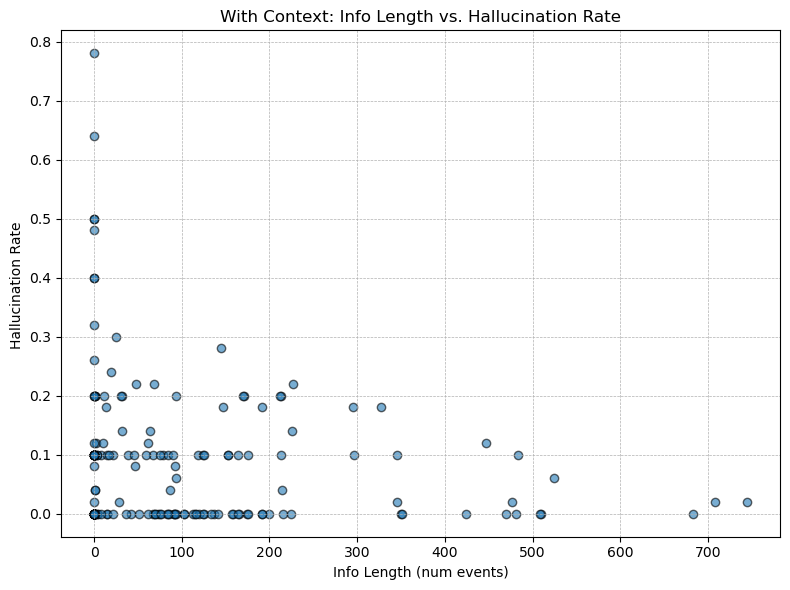

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    df_hal_withcontext["info_length"],
    df_hal_withcontext["hallucination_rate"],
    alpha=0.6,
    edgecolor="k"
)



# linear y‐axis for hallucination rate
# (no plt.yscale call is needed since linear is default)

plt.xlabel("Info Length (num events)")
plt.ylabel("Hallucination Rate ")
plt.title("With Context: Info Length vs. Hallucination Rate")

plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()